# TP 3 - Redes Neuronales
## Zuloaga

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from tp3.tsp import EuclideanTravelingSalesProblemGenerator, TspAutomapper

In [16]:
from tp3.kohonen import CircularDataGenerator, KohonenNetwork, SquareDataGenerator, TriangleDataGenerator, KohonenClustering
import tp3.tp3 as auxTp

In [17]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

## Resuelva (aproximadamente) el “Traveling salesman problem” para 200 ciudades con una red de Kohonen.

In [18]:
# N = 50
# sg = SquareDataGenerator()
# target = sg.generate(N)
# _ = plt.scatter(target[:, 0], target[:, 1], c="orange")
#
# plt.figure()
# ta = KohonenNetwork([2,25])
# ta.set_target(target)
# xx = ta.weights_map[:, 0]
# yy = ta.weights_map[:, 1]
# _ = plt.scatter(xx,yy, c="blue")
# _ = plt.fill(xx, yy, fill=False, c="blue")
#
# ta.train(100)
#
# plt.figure()
# xx = ta.weights_map[:, 0]
# yy = ta.weights_map[:, 1]
# _ = plt.scatter(target[:, 0], target[:, 1], c="orange")
# _ = plt.scatter(xx,yy, c="blue")
# _ = plt.fill(xx, yy, fill=False, c="blue")

### Distribución circular

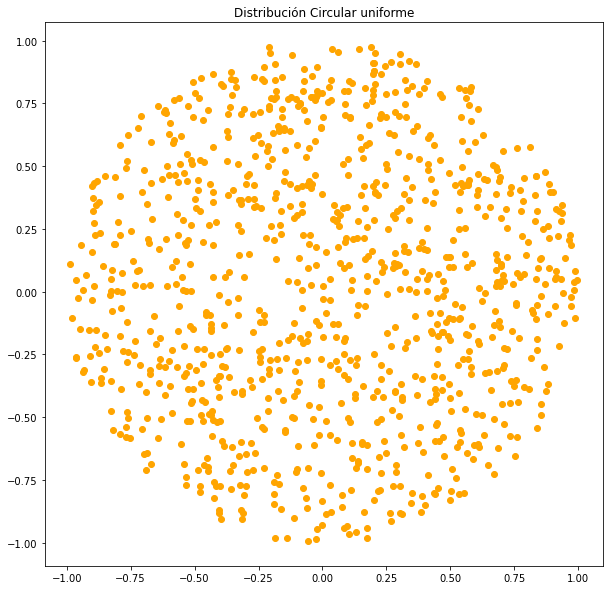

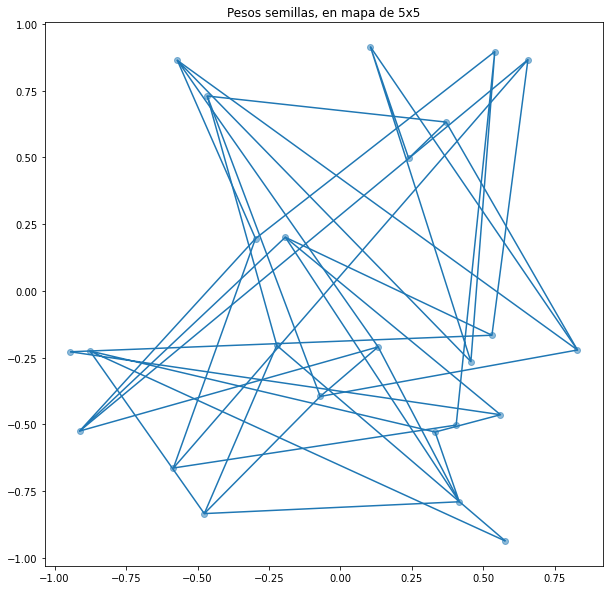

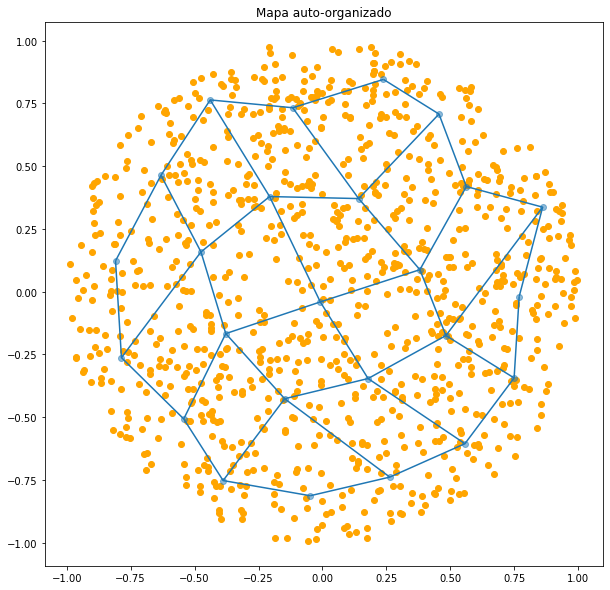

In [19]:
auxTp.plot_map_for_distribution(CircularDataGenerator())

### Distribución Cuadrada

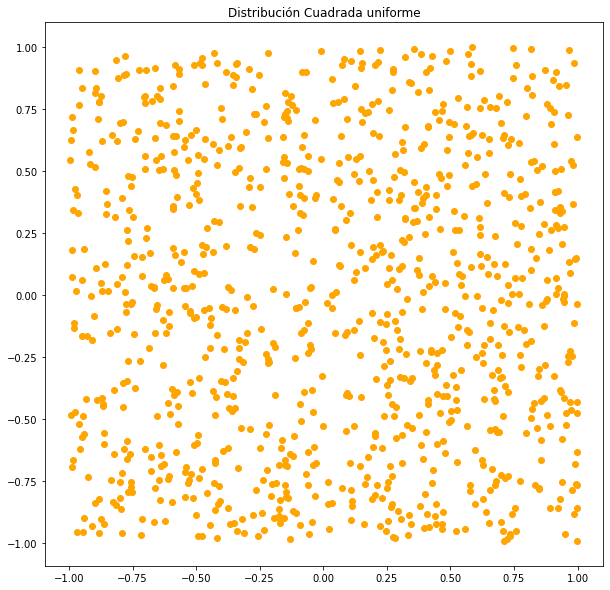

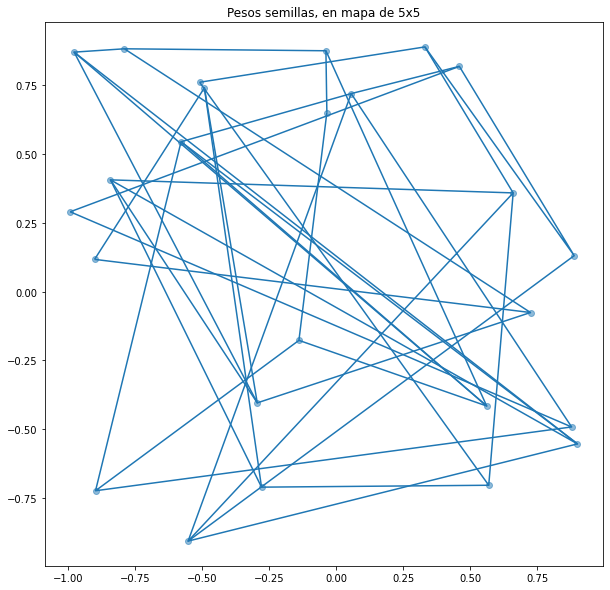

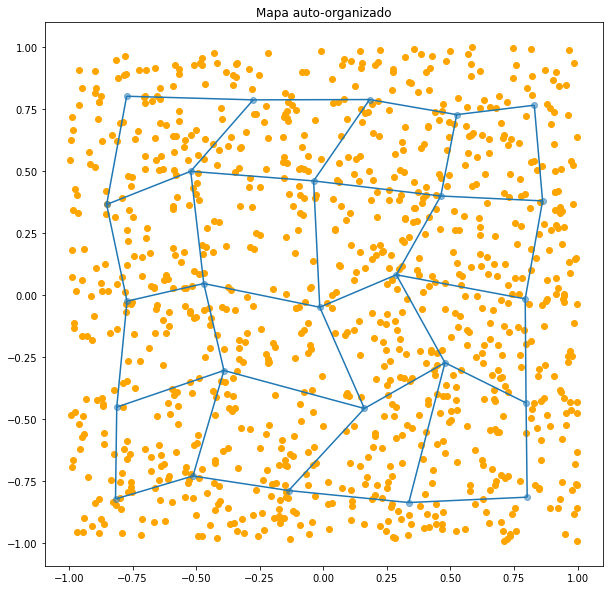

In [20]:
auxTp.plot_map_for_distribution(SquareDataGenerator())

### Distribución Triangular

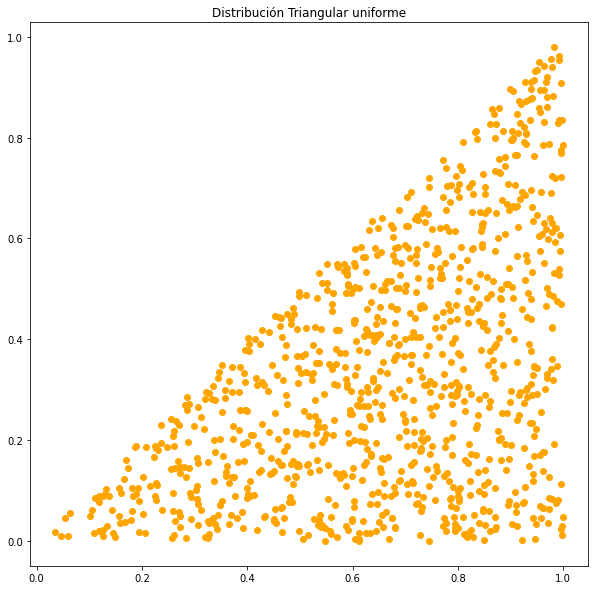

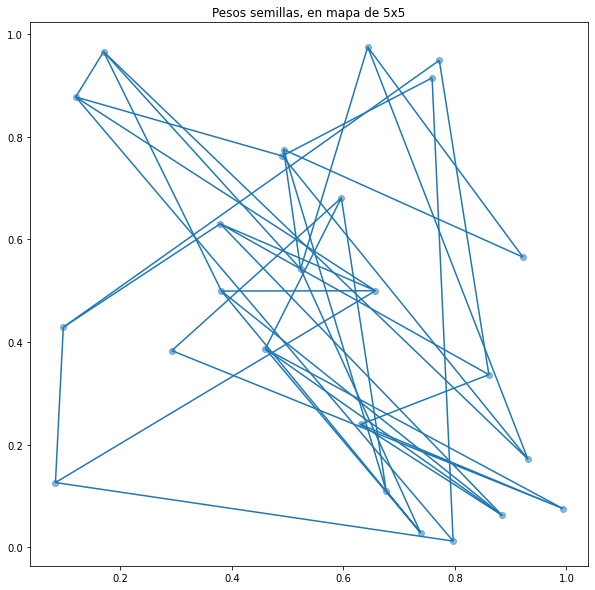

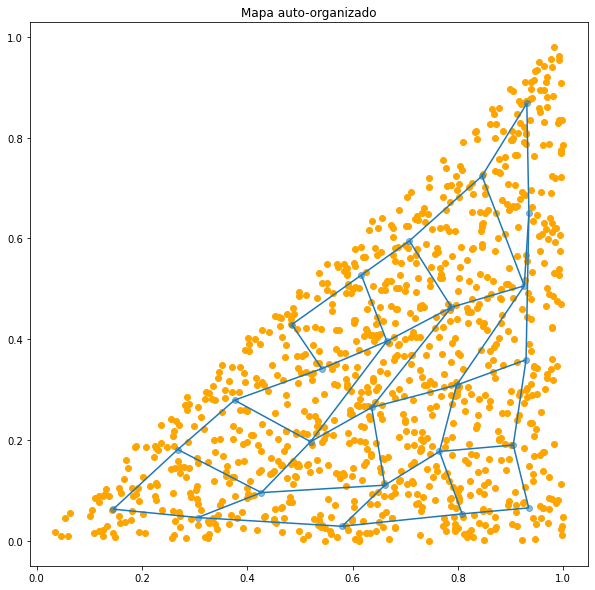

In [21]:
auxTp.plot_map_for_distribution(TriangleDataGenerator())

### Resuelva (aproximadamente) el “Traveling salesman problem” para 200 ciudades con una red de Kohonen.

El problema resulta en una reducción de dimensionalidad de 2d a 1d.

Se modifica el cálculo de la distancia utilizada por el algoritmo para usar diferencia de ángulos, y de esta forma obligar a que el viajante de comercio regrese a la ciudad de origen.

El algoritmo se prueba sobre el mismo mapa de ciudades, con distintos tamaños de mapa: 200, 300, 400 y 800 puntos.

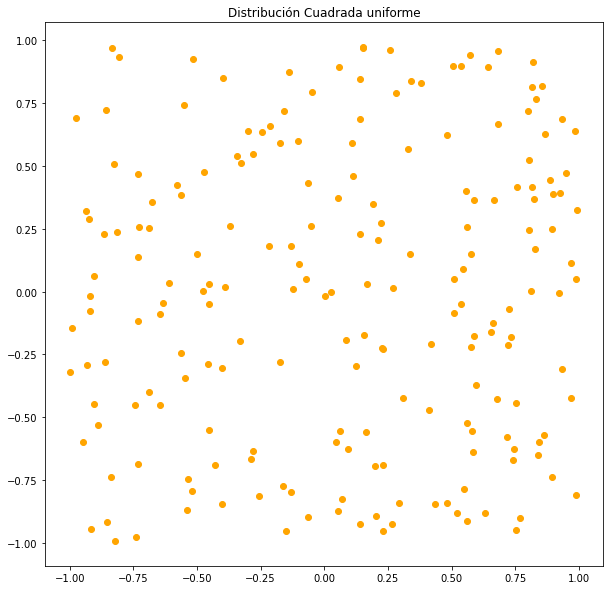

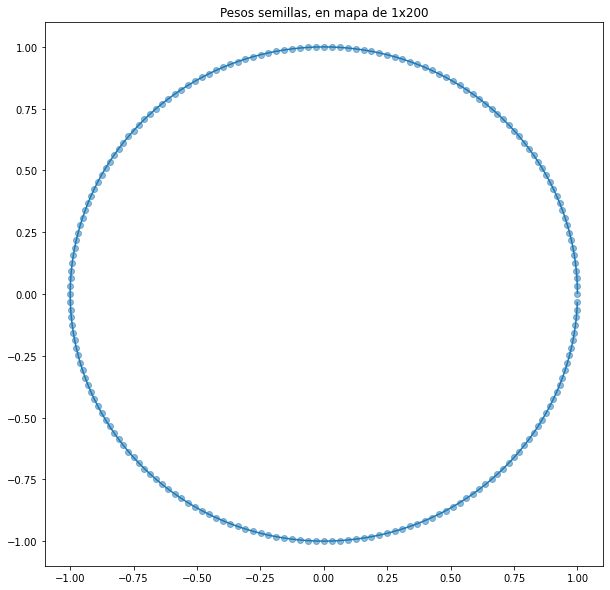

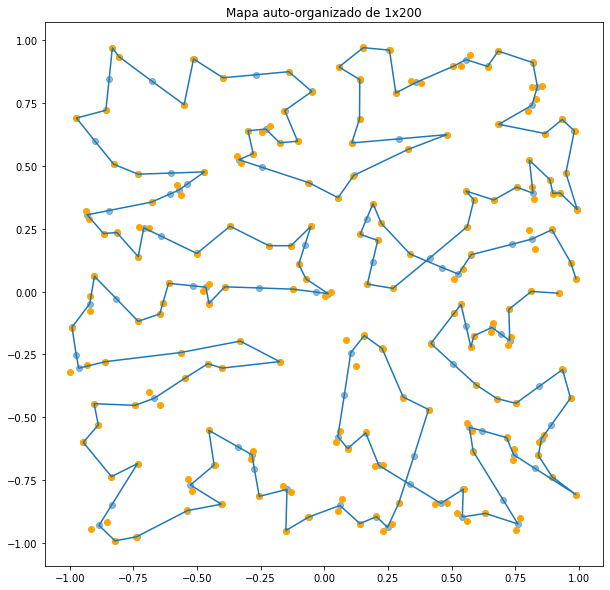

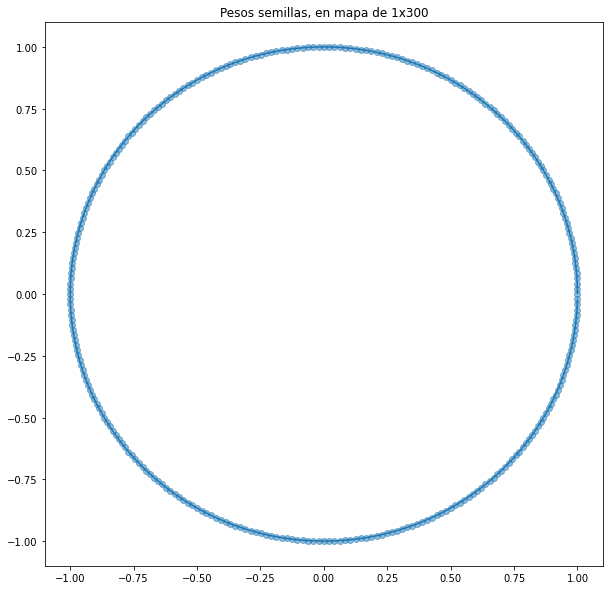

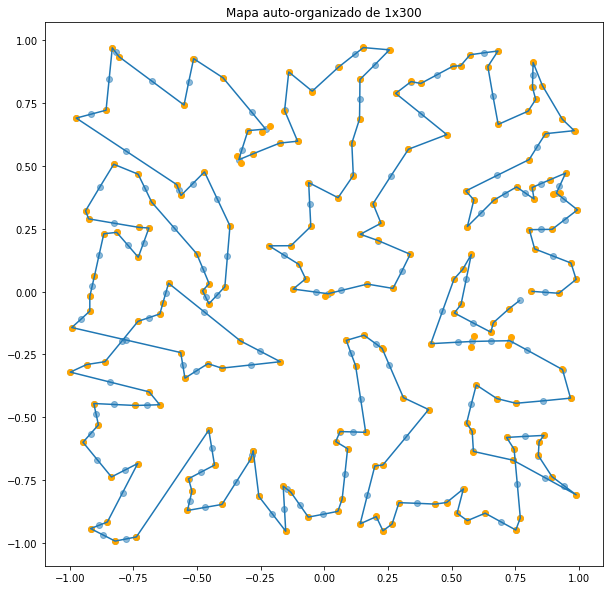

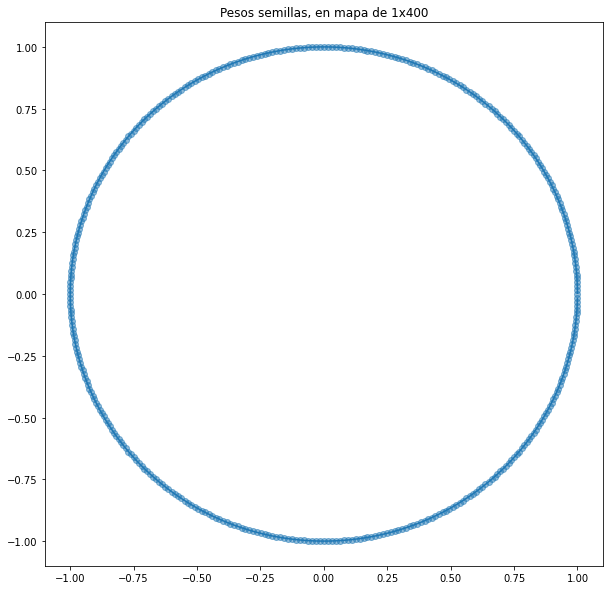

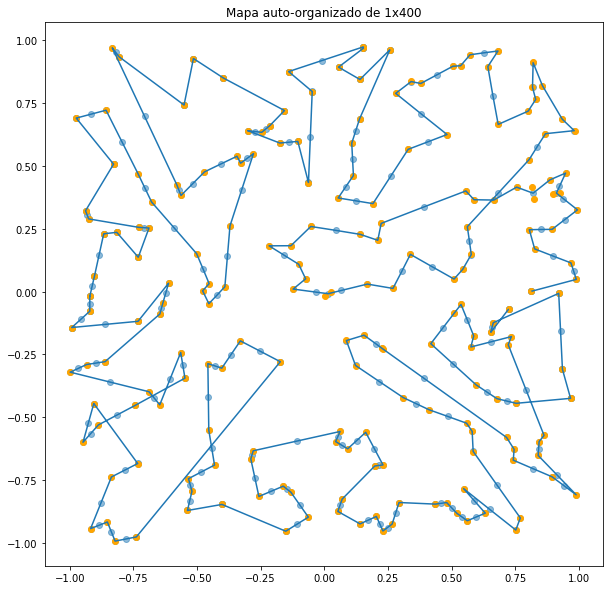

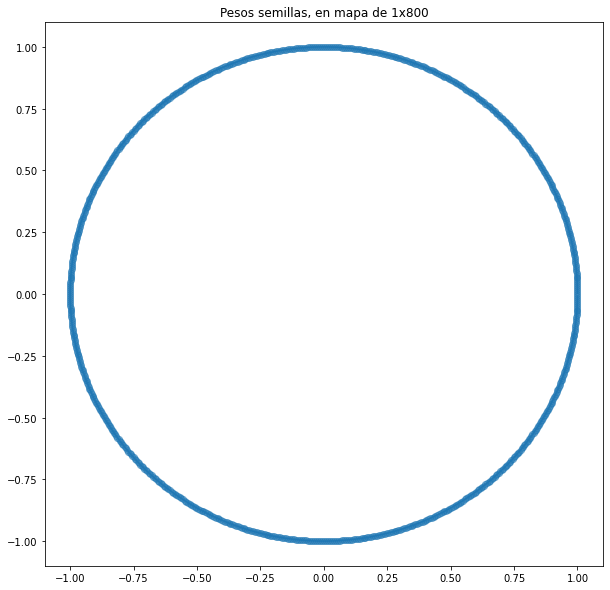

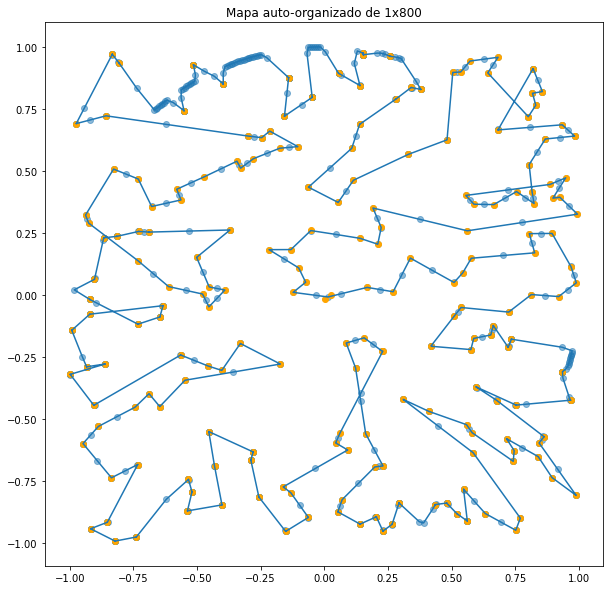

In [22]:
auxTp.plot_map_for_tsp(200)

Con 400 y 800 puntos en el mapa, el algoritmo propone soluciones con mayor cantidad de lazos cerrados que se corresponde a soluciones subóptimas.
Mientras que en las soluciones de 200 y 300 puntos, se observan casos donde multiples ciudades mapean a la misma coordenada en el mapa, lo cual requeriría de algún tipo de post-procesamiento para decidir el orden final.

## Clustering

En el archivo “datos_para_clustering.mat” encontrará una matriz de datos de 500 mediciones de una variable de 100 dimensiones.

a) Utilice una red de Kohonen para reducir la dimensionalidad de los datos.

In [ ]:
data = np.genfromtxt("data/datos_para_clustering.csv",delimiter=",")

iterations = 500
kc = KohonenClustering([25, 25])
val = kc.process(data, iterations)

Se entrena un mapa de $25 \times 25$ utilizando las 500 muestras del set de entrenamiento. Esto reduce las muestras con dimensión 100 de entrada a un espacio discreto de dos dimensiones. Tras el entrenamiento se asocian muestras al punto con pesos de distancia euclídea más cercana.

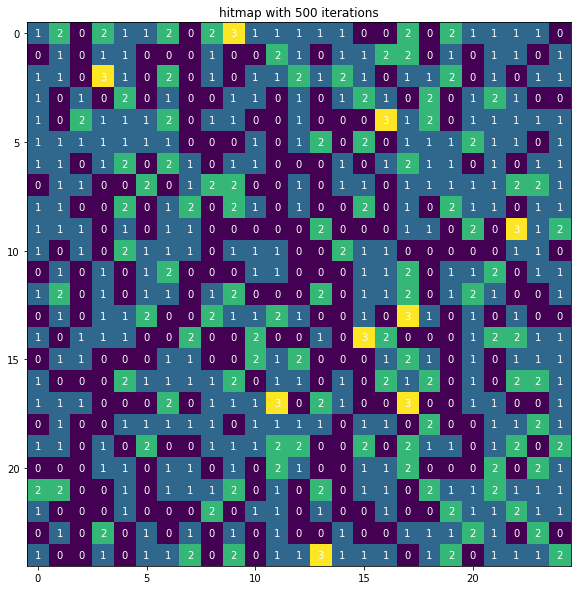

In [28]:
auxTp.plot_hitmap(val.astype(int))
_ = plt.title("hitmap with %i iterations" % iterations)

En la imagen se muestra cuantas muestras mapean en cada una de las celdas.

b) Verifique la presencia de clusters, e indique cuantos puede visualizar haciendo uso de la matriz U.

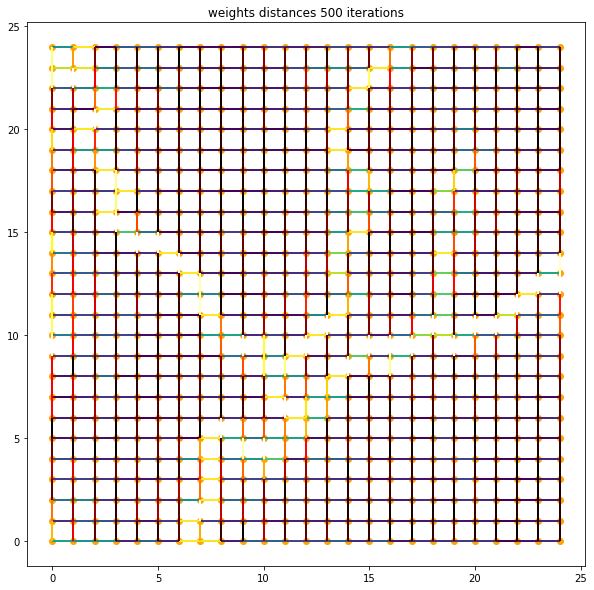

In [32]:
auxTp.plot_mesh(kc)
_ = plt.title("weights distances %i iterations" % iterations)

Se plotean con distintos colores la distancia entre los pesos de nodos vecinos en el mapa, con esto se empiezan a identificar la presencia de clusters. Para obtener la matriz U se promedian las distancias a todos los vecinos de un nodo.

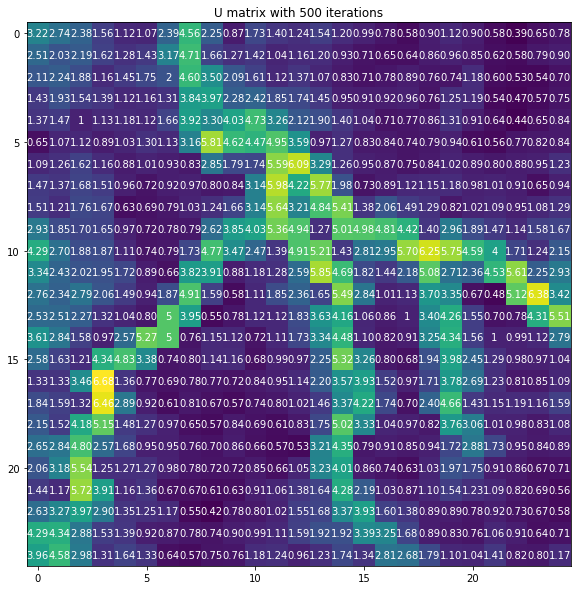

In [31]:
u_matrix=kc.mean_distances()
auxTp.plot_hitmap(u_matrix)
_=plt.title("U matrix with %i iterations" % iterations)

Al plotear la matriz U se vuelve evidente la presencia de 4 clusters.

In [11]:
ta = KohonenNetwork([25,5])

In [12]:
ta.set_target(data)

IndexError: tuple index out of range